In [11]:
!pip install trimesh vtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 7.7 MB/s eta 0:00:00


In [2]:
!wget https://github.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/blob/main/Sem3/3DML/7GTVT1P06RUB6N7EQH8SICVVS.stl

--2023-12-19 12:04:39--  https://github.com/B3aRrrr/M8MachineLearningLabsAndHomeworks/blob/main/Sem3/3DML/7GTVT1P06RUB6N7EQH8SICVVS.stl
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6408 (6.3K) [text/plain]
Saving to: ‘7GTVT1P06RUB6N7EQH8SICVVS.stl’

7GTVT1P06RUB6N7EQH8 100%[===================>]   6.26K  --.-KB/s    in 0s      

2023-12-19 12:04:40 (38.7 MB/s) - ‘7GTVT1P06RUB6N7EQH8SICVVS.stl’ saved [6408/6408]



In [35]:
import trimesh
import matplotlib.pyplot as plt
import numpy as np,os
import plotly.graph_objects as go

### trimesh

In [10]:
# Загрузка STL файла
mesh_stl = trimesh.load("7GTVT1P06RUB6N7EQH8SICVVS.stl")

# Отображение STL модели
mesh_stl.show()


In [12]:
# Создание треугольной сетки из квадратов
mesh = mesh_stl.subdivide()

# Отображение сетки поверх STL модели
mesh.show()

https://www.codetd.com/ru/article/16670820

In [29]:
def create_if_needed(folder):
    if not os.path.isdir(folder):
        os.mkdir(folder)



# parser = argparse.ArgumentParser(description='Pass object name')
# parser.add_argument('input_mesh', type=str)
# parser.add_argument('--output_folder', type=str, default="")
# parser.add_argument('--resolution', type=int, nargs=3, default=[50, 50, 50],
#                     help="resolution_X resolution_Y resolution_Z")
# parser.add_argument('--sampling', type=int, default="100000",
#                     help="number of points sampled on the mesh")
# args = parser.parse_args()


input_mesh_filename = "7GTVT1P06RUB6N7EQH8SICVVS.stl"#args.input_mesh
object_name = os.path.splitext(os.path.basename(input_mesh_filename))[0]
output_folder = os.path.join(os.getcwd(),'outputs')#args.output_folder
if len(output_folder) == 0: output_folder = object_name
RES_X, RES_Y, RES_Z = 250,250,250#args.resolution
sample_points_count = 50000#args.sampling

create_if_needed(output_folder)


mesh = trimesh.exchange.load.load(input_mesh_filename)


# Uniform Points Sampling
pts, _ = trimesh.sample.sample_surface_even(mesh, sample_points_count )

# Save sample points
sampled_points_mesh = trimesh.Trimesh(vertices=pts)
sampled_points_mesh.export(os.path.join(output_folder, object_name + "_resampled_points.ply"))


# Adjust the grid origin and voxels size
origin = pts.min(axis=0)
dimensions = pts.max(axis=0) - pts.min(axis=0)
scales = np.divide(dimensions, np.array([RES_X-1, RES_Y-1, RES_Z-1]))
scale = np.max(scales)


# Voxelize

pts -= origin
pts /= scale
pts_int = np.round(pts).astype(int)

grid = np.zeros((RES_X, RES_Y, RES_Z), dtype=int)
gooRES_X = np.where(np.logical_and(pts_int[:, 0] >= 0, pts_int[:, 0] < RES_X))[0]
gooRES_Y = np.where(np.logical_and(pts_int[:, 1] >= 0, pts_int[:, 1] < RES_Y))[0]
gooRES_Z = np.where(np.logical_and(pts_int[:, 2] >= 0, pts_int[:, 2] < RES_Z))[0]
goods = np.intersect1d(np.intersect1d(gooRES_X, gooRES_Y), gooRES_Z)
pts_int = pts_int[goods, :]
grid[pts_int[:, 0], pts_int[:, 1], pts_int[:, 2]] = 1




# Save voxels
voxel_pts = np.array([[-0.5, 0.5, -0.5],
                      [0.5, 0.5, -0.5],
                      [0.5, 0.5, 0.5],
                      [-0.5, 0.5, 0.5],
                      [-0.5, -0.5, -0.5],
                      [0.5, -0.5, -0.5],
                      [0.5, -0.5, 0.5],
                      [-0.5, -0.5, 0.5]])
voxel_faces = np.array([[0, 1, 2, 3],
                        [1, 5, 6, 2],
                        [5, 4, 7, 6],
                        [4, 0, 3, 7],
                        [0, 4, 5, 1],
                        [7, 3, 2, 6]])

def get_voxel(i, j, k):
    global voxel_pts, voxel_faces
    v = np.array([i, j, k], dtype=float) * scale
    v += origin
    points = voxel_pts * scale + v
    return points, voxel_faces.copy()

points = []
faces = []
fi = 0
for i in range(RES_X):
    for j in range(RES_Y):
        for k in range(RES_Z):
            if grid[i, j, k]:
                p, f = get_voxel(i, j, k)
                points.append(p)
                f += fi
                faces.append(f)
                fi += 8

points = np.vstack(points)
faces = np.vstack(faces)
# Write obj mesh with quad faces
with open(os.path.join(output_folder, object_name + "_voxels.obj"), "w") as fout:
    for p in points:fout.write("v " + " ".join(map(str, p)) + "\n")
    for f in faces+1:fout.write("f " + " ".join(map(str, f)) + "\n")


print(object_name, "done.")

7GTVT1P06RUB6N7EQH8SICVVS done.


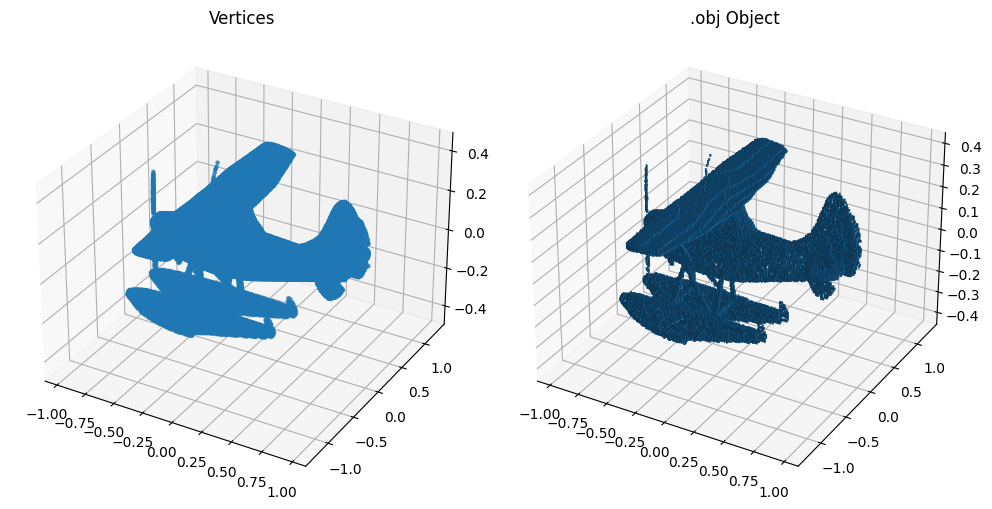

In [36]:
# Загрузка файлов .ply и .obj
mesh_ply = trimesh.load(os.path.join(output_folder, "7GTVT1P06RUB6N7EQH8SICVVS_resampled_points.ply"))
mesh_obj = trimesh.load(os.path.join(output_folder, "7GTVT1P06RUB6N7EQH8SICVVS_voxels.obj"))

vertices = mesh_ply.vertices

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
size = 5  # Размер шариков
ax1.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=size)
ax1.set_title('Vertices')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(mesh_obj.vertices[:, 0], mesh_obj.vertices[:, 1], mesh_obj.vertices[:, 2], triangles=mesh_obj.faces)
ax2.set_title('.obj Object')

plt.tight_layout()
plt.show()

### VTK

In [ ]:
import vtk
# Create a reader
reader = vtk.vtkSTLReader()
reader.SetFileName("7GTVT1P06RUB6N7EQH8SICVVS.stl")

# Create a mapper
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(reader.GetOutputPort())

# Create an actor
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# A renderer and render window
renderer = vtk.vtkRenderer()
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

# An interactor
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

# Add the actors to the scene
renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1) # Background color

# Render and interact
renderWindow.Render()
renderWindowInteractor.Start()